In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('non_encrypt_NPS_SCU_Subset.csv')

In [4]:
len(df)

98

In [5]:
df.shape


(98, 128)

In [6]:
df = df.drop(labels={'StartDate','EndDate','Status'}, axis = 1)


In [7]:
df

,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q1_NPS_GROUP,Q1,...,Q2B_EN,Q7b_1_EN,Q7b_2_EN,Q7b_3_EN,Q7b_4_EN,Q7b_9_EN,Q7b_5_EN,Q7b_6_EN,Q7b_8_EN,Q7b_7_EN
0,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,Q_RecaptchaScore,How likely are you to recommend VMware product...,How likely are you to recommend VMware product...,...,Your feedback goes a long way to helping us bu...,q7b_1_EN,q7b_2_EN,q7b_3_EN,q7b_4_EN,q7b_9_EN,q7b_5_EN,q7b_6_EN,q7b_8_EN,q7b_7_EN
1,"{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""Q_RecaptchaScore""}","{""ImportId"":""QID8_NPS_GROUP""}","{""ImportId"":""QID8""}",...,"{""ImportId"":""QID180_TEXT_TRANSLATEDen9ewb5mw""}","{""ImportId"":""QID190_x11_1_TRANSLATEDentnqq60m""}","{""ImportId"":""QID190_x12_1_TRANSLATEDen2fkokcb""}","{""ImportId"":""QID190_x14_1_TRANSLATEDenfaplxe0""}","{""ImportId"":""QID190_x15_1_TRANSLATEDenrkg48f7""}","{""ImportId"":""QID190_x17_1_TRANSLATEDenumofwtd""}","{""ImportId"":""QID190_x1_1_TRANSLATEDent3f2pz4""}","{""ImportId"":""QID190_x5_1_TRANSLATEDeni9nif2s""}","{""ImportId"":""QID190_x6_1_TRANSLATEDentufoyj2""}","{""ImportId"":""QID190_x7_1_TRANSLATEDenggjrshl""}"
2,100,223,TRUE,12/15/21 10:05,R_6AaCEkIn7LRXuUS,email,EN,0.600000024,Promoter,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,262,TRUE,12/15/21 10:05,R_74yZFhxf5VRBN2e,email,DE,1,Passive,8,...,NaN,Technically very reliable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,228,TRUE,12/15/21 10:05,R_81cqwo6bIRMxDf0,email,JA,0.899999976,Detractor,5,...,I'm not impressed that anyone other than mysel...,"I am using vSphere, but it is free and easy to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,100,418,TRUE,12/15/21 10:05,R_egQBT4ifxm96PZA,email,KO,0.800000012,Promoter,10,...,NaN,Long-standing technology and stable service,Isolated virtualization environment,start step,User-friendly GUI required,NaN,Expensive licensing policy compared to competi...,NaN,NaN,NaN
94,100,88,TRUE,12/15/21 10:05,R_0BqtEBpjFeivh2K,email,JA,0.899999976,Detractor,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,100,198,TRUE,12/15/21 10:05,R_0Dpt2H7wTzyVLvw,email,EN,1,Promoter,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,100,307,TRUE,12/15/21 10:05,R_0kaHTrtKtegXadw,email,EN,0.800000012,Passive,8,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
pd.options.display.max_rows = 20

In [10]:
column_list = df.columns.to_list()

The no of PROMOTERS (customers who have given an NPS rating of 9 and 10) are 54 and the no of DEFRACTORS (the customers who have given a rating from 0-5) are 15

So the proportion of promoters are 54/96 and proportion of defractors are 15/96
=0.56-0.15=0.41

41% customers would promote VMWare Products.

## Main Code

In [6]:

df = df[['Q1_NPS_GROUP',
'Q1',
'Q4',
'Q5_1',
'Q5_2',
'Q5_3',
'Q5_4',
'Q5_5',
'Q5_6',
'Q6_1',
'Q6_2',
'Q6_3',
'Q6_4',
'Q6_5',
'Q7A_1',
'Q7A_2',
'Q7A_3',
'Q7A_4',
'Q7A_5',
'Q7A_6',
'Q7A_7',
'Q7A_8',
'Q7A_9']]



In [7]:
df = df.loc[2:]

In [8]:
df.columns

Index(['Q1_NPS_GROUP', 'Q1', 'Q4', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5',
       'Q5_6', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q7A_1', 'Q7A_2',
       'Q7A_3', 'Q7A_4', 'Q7A_5', 'Q7A_6', 'Q7A_7', 'Q7A_8', 'Q7A_9'],
      dtype='object')

In [9]:
df['Q1_NPS_GROUP'].value_counts()

Promoter     54
Passive      27
Detractor    15
Name: Q1_NPS_GROUP, dtype: int64

In [10]:
df.Q1_NPS_GROUP.replace(to_replace=['Promoter','Passive','Detractor'],
                        value=[2,1,0],
                         inplace = True)

In [11]:
df

,Q1_NPS_GROUP,Q1,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,...,Q6_5,Q7A_1,Q7A_2,Q7A_3,Q7A_4,Q7A_5,Q7A_6,Q7A_7,Q7A_8,Q7A_9
2,2,9,Yes,5,5,5,5,6,6,5,...,5,Extremely Satisfied - 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,8,Yes,3,6,4,4,6,5,5,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,Yes,5,4,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,10,Yes,5,6,5,6,Extremely Satisfied - 7,6,5,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,10,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2,10,Yes,5,6,6,6,Extremely Satisfied - 7,6,6,...,Extremely Agree - 7,Extremely Satisfied - 7,6,5,6,5,NaN,NaN,NaN,NaN
94,0,5,Yes,NaN,NaN,NaN,5,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2,9,Yes,6,Extremely Satisfied - 7,6,Extremely Satisfied - 7,Extremely Satisfied - 7,Extremely Satisfied - 7,5,...,Extremely Agree - 7,Extremely Satisfied - 7,Extremely Satisfied - 7,NaN,Extremely Satisfied - 7,NaN,NaN,NaN,NaN,NaN
96,1,8,Yes,4,5,6,5,6,6,6,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.Q4.replace(to_replace=['Yes','No'],
                        value=[1,0],
                         inplace = True)

In [13]:
df.Q4.value_counts()

1.0    82
0.0    12
Name: Q4, dtype: int64

In [14]:
df

,Q1_NPS_GROUP,Q1,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,...,Q6_5,Q7A_1,Q7A_2,Q7A_3,Q7A_4,Q7A_5,Q7A_6,Q7A_7,Q7A_8,Q7A_9
2,2,9,1.0,5,5,5,5,6,6,5,...,5,Extremely Satisfied - 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,8,1.0,3,6,4,4,6,5,5,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,1.0,5,4,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,10,1.0,5,6,5,6,Extremely Satisfied - 7,6,5,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2,10,1.0,5,6,6,6,Extremely Satisfied - 7,6,6,...,Extremely Agree - 7,Extremely Satisfied - 7,6,5,6,5,NaN,NaN,NaN,NaN
94,0,5,1.0,NaN,NaN,NaN,5,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2,9,1.0,6,Extremely Satisfied - 7,6,Extremely Satisfied - 7,Extremely Satisfied - 7,Extremely Satisfied - 7,5,...,Extremely Agree - 7,Extremely Satisfied - 7,Extremely Satisfied - 7,NaN,Extremely Satisfied - 7,NaN,NaN,NaN,NaN,NaN
96,1,8,1.0,4,5,6,5,6,6,6,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.Q5_1.value_counts()

5                               24
Extremely Satisfied  -   7      17
6                               15
3                                8
4                                8
2                                7
Extremely Dissatisfied  -  1     3
Name: Q5_1, dtype: int64

In [16]:
df.Q5_1.isna().sum()

14

In [17]:
df.columns

Index(['Q1_NPS_GROUP', 'Q1', 'Q4', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5',
       'Q5_6', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q7A_1', 'Q7A_2',
       'Q7A_3', 'Q7A_4', 'Q7A_5', 'Q7A_6', 'Q7A_7', 'Q7A_8', 'Q7A_9'],
      dtype='object')

In [18]:
# for col in list(df)[3:]:
#     df[col] = df[col].replace(['Extremely Satisfied  -   7','Extremely Dissatisfied  -  1']
#                                ,[7,1])

In [19]:
# for col in list(df)[14:]:
#     df[col] = df[col].replace(['Extremely Satisfied  - 7','Extremely Dissatisfied  -  1']
#                                ,[7,1])

In [20]:
df.Q7A_1.values

array(['Extremely Satisfied  - 7', '6', '5', '6', nan, '5',
       'Extremely Satisfied  - 7', '6', '6', 'Extremely Satisfied  - 7',
       nan, nan, nan, 'Extremely Satisfied  - 7',
       'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7', '4', '6',
       '5', 'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7', '5',
       '5', '5', 'Extremely Satisfied  - 7', '5', '5',
       'Extremely Satisfied  - 7', nan, 'Extremely Satisfied  - 7',
       'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7', nan,
       'Extremely Satisfied  - 7', nan, '6', '6', '6', '6', '6', nan,
       'Extremely Satisfied  - 7', nan, '6', nan, nan, '5', '5',
       'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7',
       'Extremely Satisfied  - 7', nan, '6', '5', '6',
       'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7', '6', nan,
       nan, nan, 'Extremely Satisfied  - 7', 'Extremely Satisfied  - 7',
       '4', nan, 'Extremely Satisfied  - 7', '6',
       'Extremely Satisfied  - 

In [21]:
for col in list(df)[3:]:
    df[col] = df[col].apply(lambda x: x if isinstance(x,float) else (x.split()[-1] if len(x.split())>1 else x))

In [22]:
df

,Q1_NPS_GROUP,Q1,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,...,Q6_5,Q7A_1,Q7A_2,Q7A_3,Q7A_4,Q7A_5,Q7A_6,Q7A_7,Q7A_8,Q7A_9
2,2,9,1.0,5,5,5,5,6,6,5,...,5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,8,1.0,3,6,4,4,6,5,5,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,1.0,5,4,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,10,1.0,5,6,5,6,7,6,5,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2,10,1.0,5,6,6,6,7,6,6,...,7,7,6,5,6,5,NaN,NaN,NaN,NaN
94,0,5,1.0,NaN,NaN,NaN,5,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2,9,1.0,6,7,6,7,7,7,5,...,7,7,7,NaN,7,NaN,NaN,NaN,NaN,NaN
96,1,8,1.0,4,5,6,5,6,6,6,...,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
imp_col = []
for col in list(df):
    cnt = df[col].isna().sum()
    per = cnt*100/len(df)
    if per<30:
        imp_col.append(col)
#     print(col,'-->',df[col].isna().sum())

In [24]:
df = df[imp_col]

In [25]:
for col in df:
    df[col] = df[col].astype('float')
    df[col] = round(df[col].fillna(df[col].mean()))

In [26]:
df

,Q1_NPS_GROUP,Q1,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7A_1
2,2.0,9.0,1.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,5.0,7.0
3,1.0,8.0,1.0,3.0,6.0,4.0,4.0,6.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0
4,0.0,5.0,1.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,5.0
5,2.0,10.0,1.0,5.0,6.0,5.0,6.0,7.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0
6,2.0,10.0,1.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2.0,10.0,1.0,5.0,6.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0
94,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,4.0,6.0,6.0,6.0
95,2.0,9.0,1.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,7.0,7.0
96,1.0,8.0,1.0,4.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0


In [27]:
df.rename(columns={'Q1_NPS_GROUP':'Recommend_Group','Q1':'Recommend','Q4':'Trust','Q5_1':'Pricing',
                 'Q5_2':'Puchasing_Process','Q5_3':'Renewals','Q5_4':'Onboarding','Q5_5':'Services',
                   'Q5_6':'Optimization','Q6_1':'Flexibility','Q6_2':'Solves_Problems','Q6_3':'Relationship',
                  'Q6_4':'Achieve_Objectives','Q6_5':'Innovation_Leader','Q7A_1':'DataCenter Solutions'},inplace=True)

In [28]:
df

,Recommend_Group,Recommend,Trust,Pricing,Puchasing_Process,Renewals,Onboarding,Services,Optimization,Flexibility,Solves_Problems,Relationship,Achieve_Objectives,Innovation_Leader,DataCenter Solutions
2,2.0,9.0,1.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,5.0,7.0
3,1.0,8.0,1.0,3.0,6.0,4.0,4.0,6.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0
4,0.0,5.0,1.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,5.0
5,2.0,10.0,1.0,5.0,6.0,5.0,6.0,7.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0
6,2.0,10.0,1.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2.0,10.0,1.0,5.0,6.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0
94,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,4.0,6.0,6.0,6.0
95,2.0,9.0,1.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,7.0,7.0
96,1.0,8.0,1.0,4.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0


In [29]:
# promoter: 2
# destractor: 1
# passive: 0

In [30]:
df['Recommend_Group'].value_counts()

2.0    54
1.0    27
0.0    15
Name: Recommend_Group, dtype: int64

In [31]:
x  = df['Recommend'].value_counts()

In [32]:
x.index

Float64Index([10.0, 8.0, 9.0, 7.0, 5.0, 3.0, 6.0, 0.0], dtype='float64')

In [33]:
x  =df['Recommend'].value_counts()

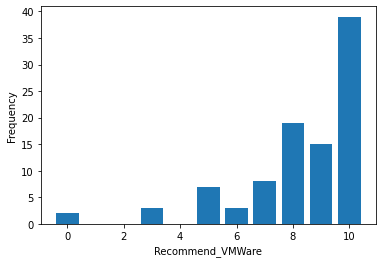

In [34]:
plt.bar(x.index,x)
plt.xlabel('Recommend_VMWare')
plt.ylabel('Frequency')
plt.show()

In [35]:
df.corr()

,Recommend_Group,Recommend,Trust,Pricing,Puchasing_Process,Renewals,Onboarding,Services,Optimization,Flexibility,Solves_Problems,Relationship,Achieve_Objectives,Innovation_Leader,DataCenter Solutions
Recommend_Group,1.000000,0.906000,0.206349,0.388348,0.438717,0.452819,0.455093,0.494466,0.472405,0.607407,0.542714,0.588039,0.520370,0.515268,0.477539
Recommend,0.906000,1.000000,0.340281,0.451635,0.487968,0.500482,0.547805,0.553419,0.515017,0.683866,0.622206,0.646390,0.633911,0.620300,0.526549
Trust,0.206349,0.340281,1.000000,-0.020203,0.099442,0.165177,0.127995,0.104793,0.111154,0.127132,0.144473,0.101128,0.170698,0.184204,0.078143
Pricing,0.388348,0.451635,-0.020203,1.000000,0.599758,0.573796,0.561138,0.574025,0.597343,0.581604,0.582083,0.567297,0.689536,0.484902,0.551325
Puchasing_Process,0.438717,0.487968,0.099442,0.599758,1.000000,0.856011,0.649883,0.602161,0.708882,0.619471,0.619389,0.526994,0.627407,0.530230,0.609721
Renewals,0.452819,0.500482,0.165177,0.573796,0.856011,1.000000,0.699602,0.582622,0.705111,0.654546,0.572220,0.518593,0.570442,0.471282,0.585005
Onboarding,0.455093,0.547805,0.127995,0.561138,0.649883,0.699602,1.000000,0.753628,0.801700,0.703565,0.656578,0.591964,0.665147,0.650895,0.563217
Services,0.494466,0.553419,0.104793,0.574025,0.602161,0.582622,0.753628,1.000000,0.781395,0.622727,0.599941,0.718412,0.695590,0.605760,0.735839
Optimization,0.472405,0.515017,0.111154,0.597343,0.708882,0.705111,0.801700,0.781395,1.000000,0.717158,0.721705,0.646530,0.680382,0.712224,0.656991
Flexibility,0.607407,0.683866,0.127132,0.581604,0.619471,0.654546,0.703565,0.622727,0.717158,1.000000,0.732549,0.727639,0.691325,0.748339,0.572320


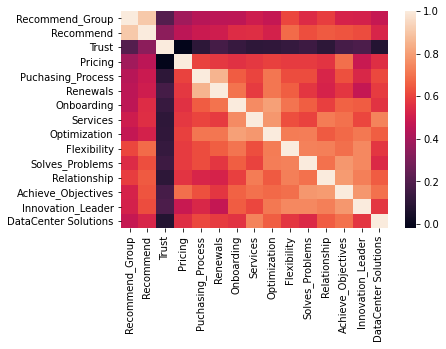

In [49]:
# identify if correlation exists 
sns.heatmap(df.corr())
plt.show()

In [37]:
df

,Recommend_Group,Recommend,Trust,Pricing,Puchasing_Process,Renewals,Onboarding,Services,Optimization,Flexibility,Solves_Problems,Relationship,Achieve_Objectives,Innovation_Leader,DataCenter Solutions
2,2.0,9.0,1.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,5.0,7.0
3,1.0,8.0,1.0,3.0,6.0,4.0,4.0,6.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0
4,0.0,5.0,1.0,5.0,4.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,5.0
5,2.0,10.0,1.0,5.0,6.0,5.0,6.0,7.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0
6,2.0,10.0,1.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2.0,10.0,1.0,5.0,6.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0
94,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,4.0,6.0,6.0,6.0
95,2.0,9.0,1.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,7.0,7.0
96,1.0,8.0,1.0,4.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0


In [38]:
df[df['Recommend_Group']==2].mean()[1:].mean()

6.013227513227513

In [39]:
df[df['Recommend_Group']==2].mean()[1:]

Recommend               9.722222
Trust                   0.925926
Pricing                 5.425926
Puchasing_Process       5.833333
Renewals                5.796296
Onboarding              6.148148
Services                6.425926
Optimization            6.370370
Flexibility             5.925926
Solves_Problems         6.111111
Relationship            6.407407
Achieve_Objectives      6.259259
Innovation_Leader       6.388889
DataCenter Solutions    6.444444
dtype: float64

In [40]:
df[df['Recommend_Group']==1].mean()[1:].mean()

5.19047619047619

In [41]:
df[df['Recommend_Group']==1].mean()[1:]

Recommend               7.703704
Trust                   0.851852
Pricing                 4.481481
Puchasing_Process       5.000000
Renewals                5.000000
Onboarding              5.222222
Services                5.666667
Optimization            5.518519
Flexibility             5.259259
Solves_Problems         5.259259
Relationship            5.666667
Achieve_Objectives      5.407407
Innovation_Leader       5.740741
DataCenter Solutions    5.888889
dtype: float64

In [42]:
df[df['Recommend_Group']==0].mean()[1:].mean()

4.171428571428572

In [43]:
df[df['Recommend_Group']==0].mean()[1:]

Recommend               4.133333
Trust                   0.733333
Pricing                 3.866667
Puchasing_Process       4.266667
Renewals                4.200000
Onboarding              4.733333
Services                4.933333
Optimization            5.000000
Flexibility             3.533333
Solves_Problems         4.200000
Relationship            4.466667
Achieve_Objectives      4.466667
Innovation_Leader       4.600000
DataCenter Solutions    5.266667
dtype: float64

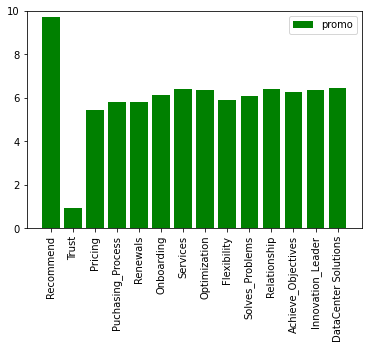

In [44]:
promo = df[df['Recommend_Group']==2].mean()
plt.bar(promo.index[1:],promo[1:],color='g',label='promo')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 10])
plt.legend()
plt.show()

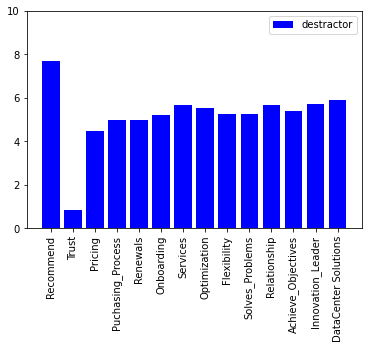

In [47]:
promo = df[df['Recommend_Group']==1].mean()
plt.bar(promo.index[1:],promo[1:],color='b',label='destractor')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 10])
plt.legend()
plt.show()

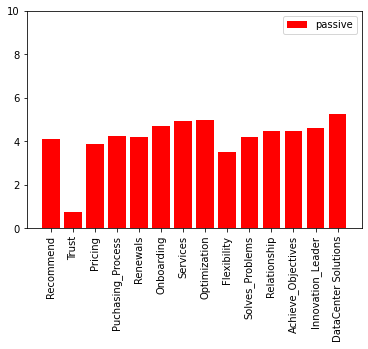

In [48]:
promo = df[df['Recommend_Group']==0].mean()
plt.bar(promo.index[1:],promo[1:],color='r',label='passive')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 10])
plt.legend()
plt.show()